# Sentiment Analysis using ML models

Step 1: Import Libraries

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Text processing
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Plot settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

Step 2: Load the Dataset

In [3]:
# Load the CSV file
df = pd.read_csv("sentimentdataset.csv")

# Display first few rows
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Step 3: Initial Data Inspection

In [4]:
# Dataset info
print("\n📘 Dataset Information:")
df.info()


📘 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
# Check missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Missing Values:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [6]:
# Quick statistical summary for numerical columns
print("\n📊 Numerical Summary:")
print(df.describe())


📊 Numerical Summary:
       Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   2

In [7]:
# Check unique sentiment labels
print("\n🎯 Sentiment Classes:")
print(df['Sentiment'].value_counts())


🎯 Sentiment Classes:
Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64


Step 4: Exploratory Data Analysis(EDA)

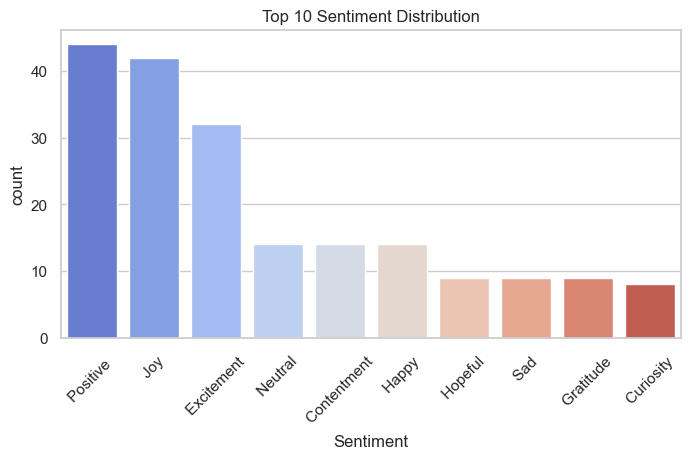

In [8]:
# Get top 10 sentiments by count
top_sentiments = df['Sentiment'].value_counts().nlargest(10).index
df_top = df[df['Sentiment'].isin(top_sentiments)]

# 4.1 Sentiment Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df_top, x='Sentiment', palette='coolwarm', order=top_sentiments)
plt.title('Top 10 Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

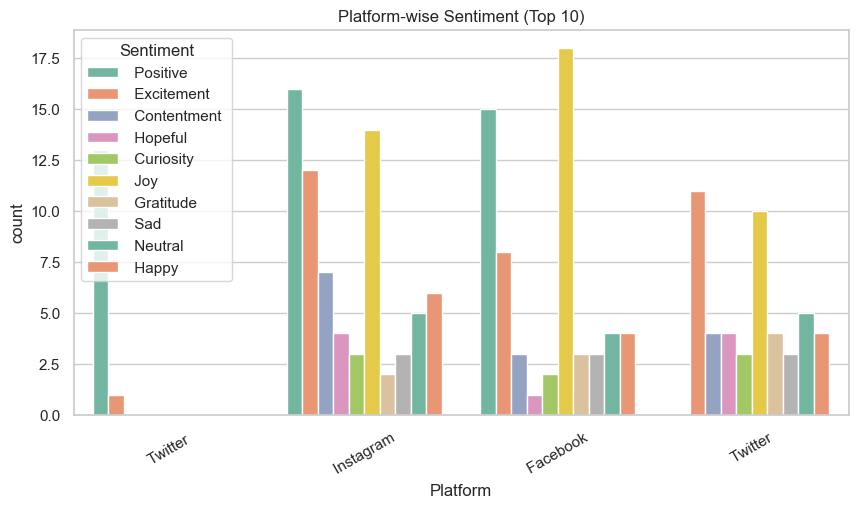

In [9]:
# 4.2 Platform-wise Sentiment Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_top, x='Platform', hue='Sentiment', palette='Set2')
plt.title('Platform-wise Sentiment (Top 10)')
plt.xticks(rotation=30)
plt.show()

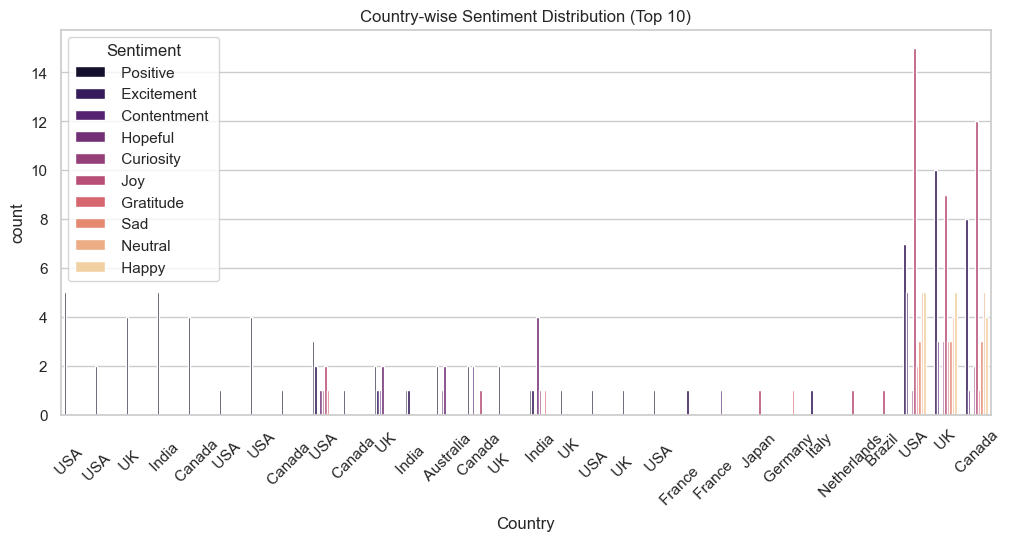

In [10]:
# 4.3 Country-wise Sentiment
plt.figure(figsize=(12,5))
sns.countplot(data=df_top, x='Country', hue='Sentiment', palette='magma')
plt.title('Country-wise Sentiment Distribution (Top 10)')
plt.xticks(rotation=45)
plt.show()

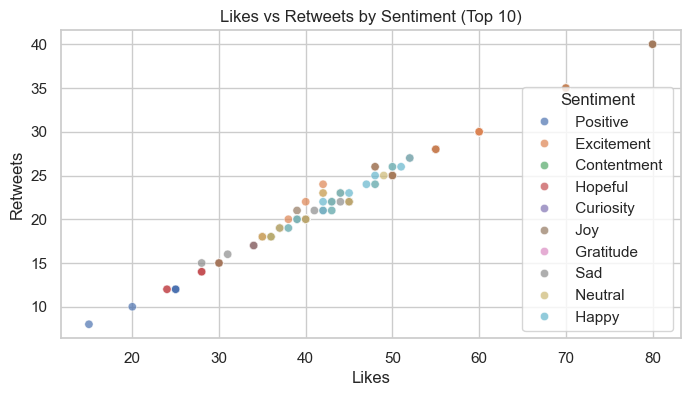

In [11]:
# 4.4 Likes vs Retweets
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_top, x='Likes', y='Retweets', hue='Sentiment', alpha=0.7)
plt.title('Likes vs Retweets by Sentiment (Top 10)')
plt.show()

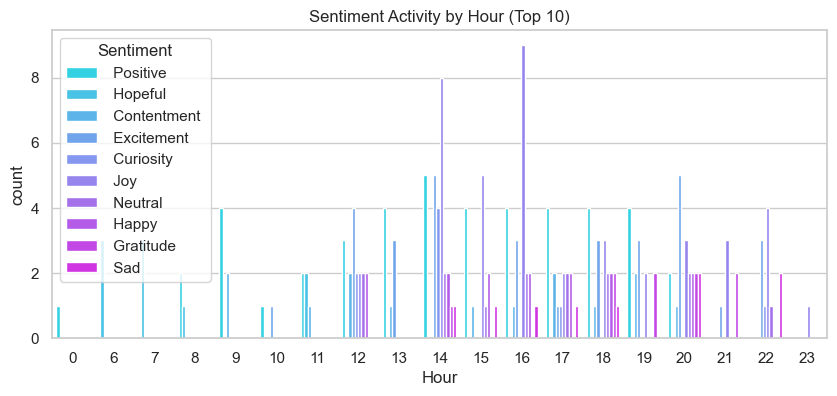

In [12]:
# 4.5 Sentiment Trend Over Hours
plt.figure(figsize=(10,4))
sns.countplot(data=df_top, x='Hour', hue='Sentiment', palette='cool')
plt.title('Sentiment Activity by Hour (Top 10)')
plt.show()

Step 5: Text Cleaning & Preprocessing

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#\w+", "", text)           # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)       # keep only letters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text.strip()

df['Clean_Text'] = df['Text'].apply(clean_text)
df[['Text', 'Clean_Text']].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shanmukjavvadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Clean_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight
5,Feeling grateful for the little things in lif...,feeling grateful little things life
6,Rainy days call for cozy blankets and hot coc...,rainy days call cozy blankets hot cocoa
7,The new movie release is a must-watch! ...,new movie release mustwatch
8,Political discussions heating up on the timel...,political discussions heating timeline
9,Missing summer vibes and beach days. ...,missing summer vibes beach days


Step 6: Text Analysis

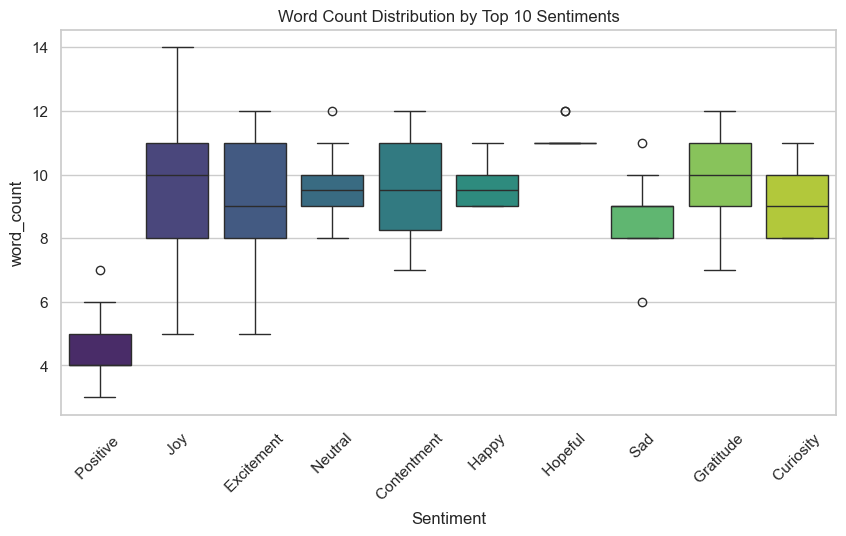


Top words for  Positive  :


,Word,Frequency
0,new,10
1,day,4
2,weekend,4
3,feeling,4
4,enjoying,3



Top words for  Joy :


,Word,Frequency
0,music,7
1,art,7
2,joy,6
3,every,6
4,attended,6



Top words for  Excitement :


,Word,Frequency
0,new,8
1,adventure,5
2,excitement,4
3,weekend,4
4,attempting,4



Top words for  Neutral :


,Word,Frequency
0,new,5
1,school,5
2,exploring,3
3,club,3
4,attending,3



Top words for  Contentment :


,Word,Frequency
0,contentment,5
1,serene,3
2,river,3
3,heart,3
4,inner,3



Top words for  Happy :


,Word,Frequency
0,friends,3
1,laughter,3
2,celebrating,2
3,birthday,2
4,surprise,2



Top words for  Hopeful :


,Word,Frequency
0,hopeful,8
1,optimism,6
2,brighter,5
3,tomorrow,5
4,towards,4



Top words for  Sad :


,Word,Frequency
0,feeling,5
1,challenges,2
2,sometimes,2
3,unexpected,2
4,missing,2



Top words for  Gratitude :


,Word,Frequency
0,gratitude,3
1,story,3
2,writing,3
3,every,3
4,thankfulness,2



Top words for  Curiosity :


,Word,Frequency
0,new,4
1,curiosity,2
2,art,2
3,learning,2
4,unveiling,1


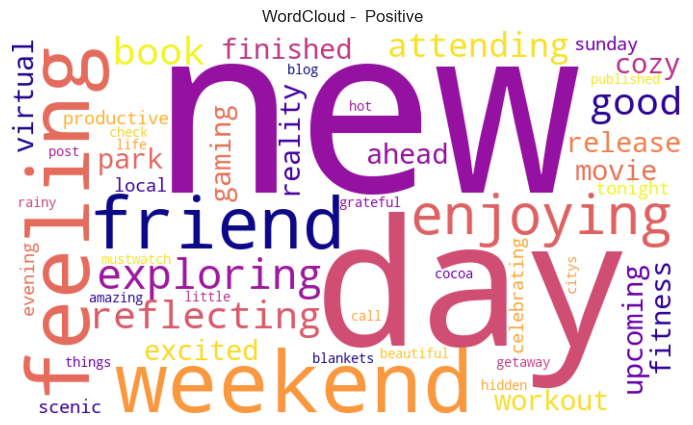

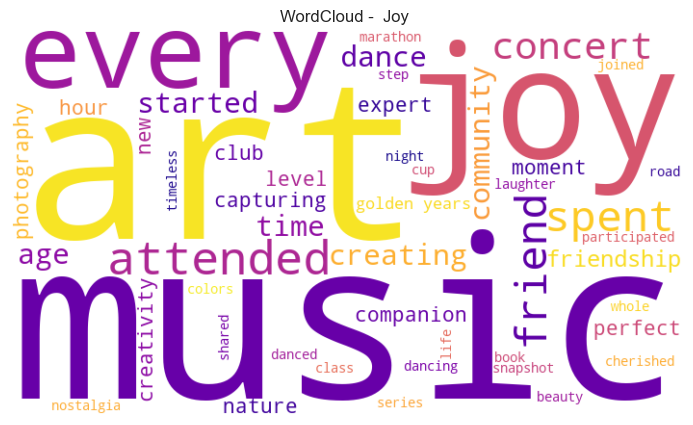

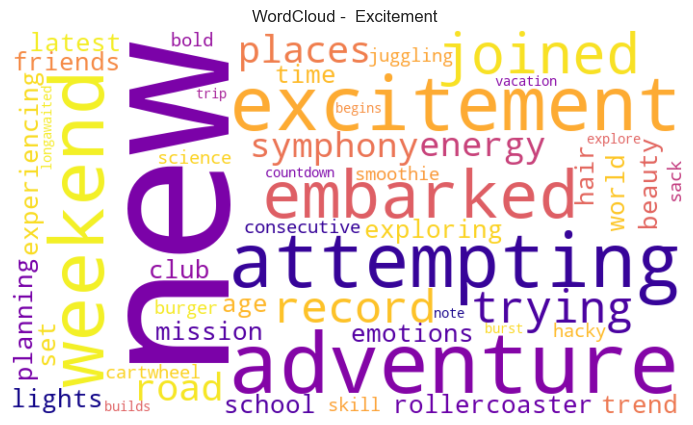

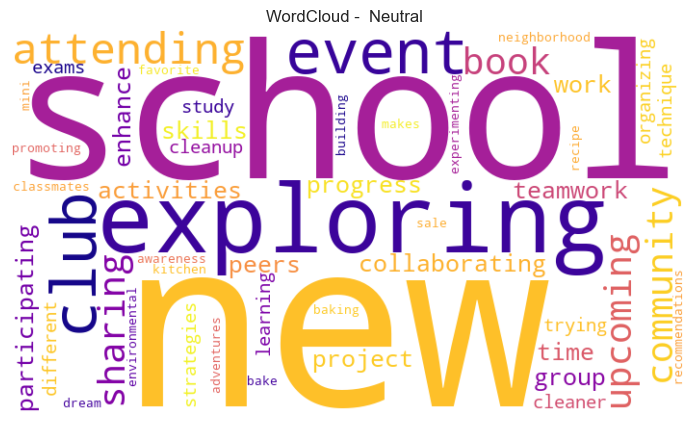

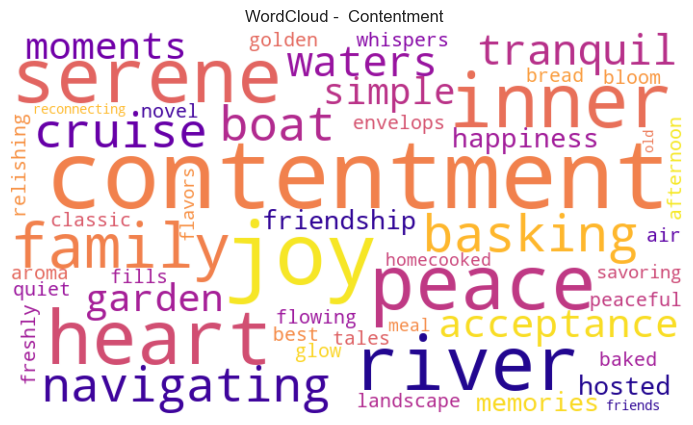

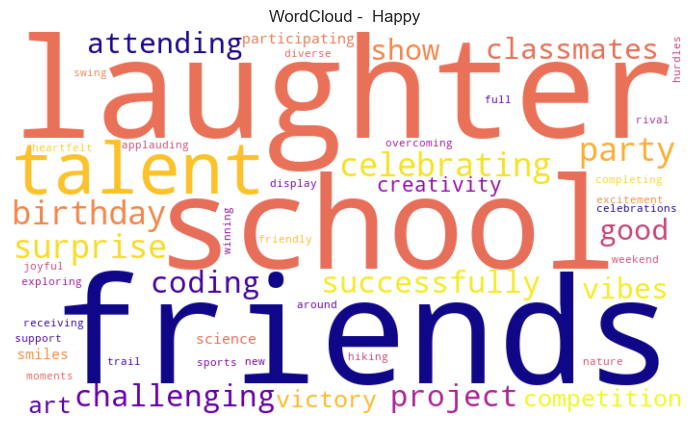

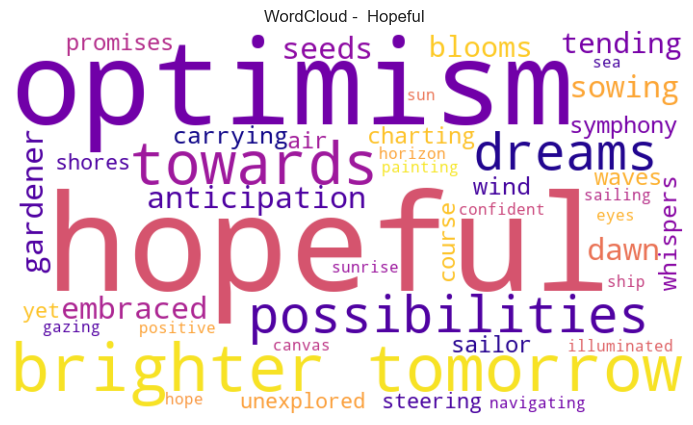

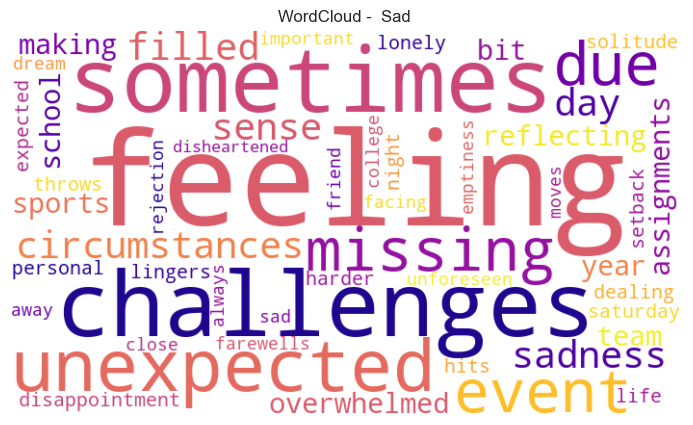

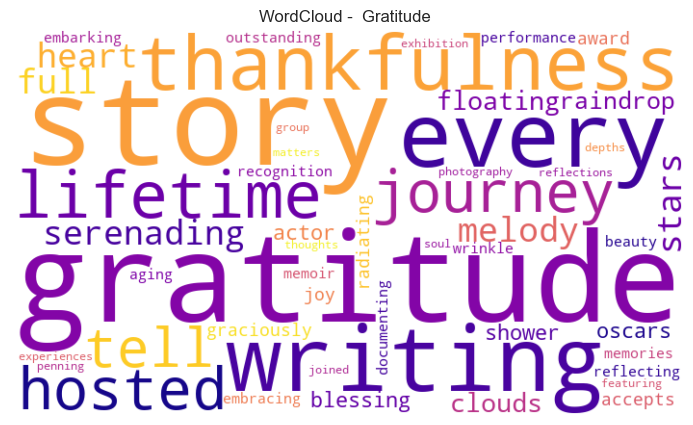

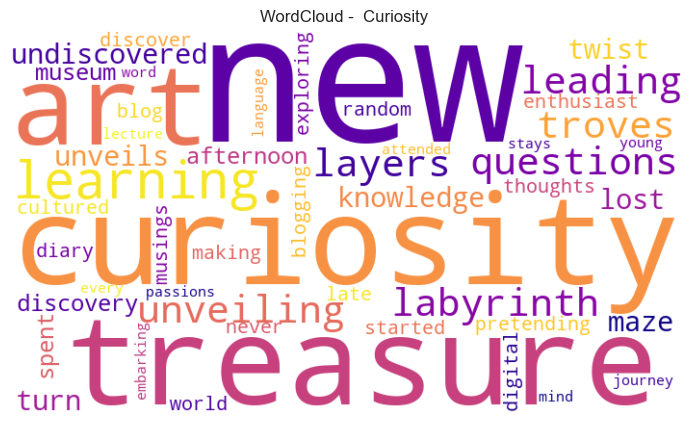

In [14]:
# Select top 10 most frequent sentiments
top_sentiments = df['Sentiment'].value_counts().nlargest(10).index
df_top = df[df['Sentiment'].isin(top_sentiments)]

# 6.1 Average Word Count per Sentiment (Top 10)
df_top['word_count'] = df_top['Clean_Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.boxplot(data=df_top, x='Sentiment', y='word_count', palette='viridis', order=top_sentiments)
plt.title('Word Count Distribution by Top 10 Sentiments')
plt.xticks(rotation=45)
plt.show()

# 6.2 Most Common Words per Sentiment (Top 10 sentiments, top 5 words each)
def most_common_words(sentiment, n=5):
    words = " ".join(df_top[df_top['Sentiment']==sentiment]['Clean_Text']).split()
    common = Counter(words).most_common(n)
    return pd.DataFrame(common, columns=['Word','Frequency'])

for s in top_sentiments:
    print(f"\nTop words for {s}:")
    display(most_common_words(s, n=5))  # only top 5 words


# 6.3 WordClouds for Top 10 Sentiments
for sentiment in top_sentiments:
    text = " ".join(df_top[df_top['Sentiment']==sentiment]['Clean_Text'])
    wc = WordCloud(width=700, height=400, background_color='white', colormap='plasma', max_words=50).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {sentiment}")
    plt.show()

Step 7: Feature Extraction

In [15]:
# Combine rare classes with <2 samples into 'Other'
# Combine rare classes with <2 samples into 'Other'
counts = df['Sentiment'].value_counts()
rare_classes = counts[counts < 2].index
df['Sentiment'] = df['Sentiment'].replace(rare_classes, 'Other')

# TF-IDF
tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1,3),
    min_df=2,
    max_df=0.95
)
X = tfidf.fit_transform(df['Clean_Text'])
y = df['Sentiment']

# Train/Test Split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (585, 1758) Test shape: (147, 1758)


Step 8: Model Traning and Comparision

In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.2177
Naive Bayes Accuracy: 0.1973
Linear SVM Accuracy: 0.4626
Random Forest Accuracy: 0.4354


Step 9: Visual Comparision of Model Accuracies

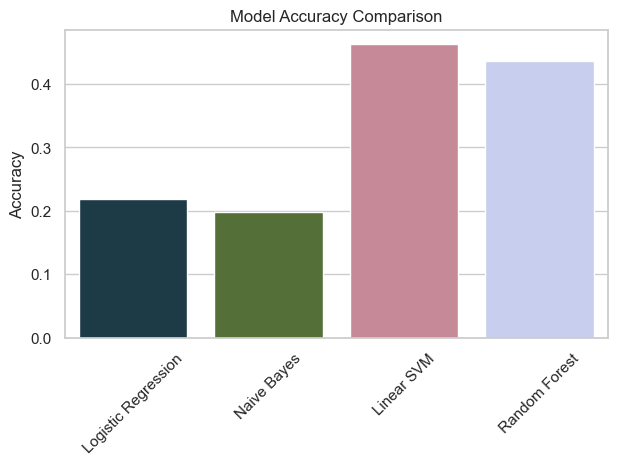


✅ Best Performing Model: Linear SVM (46.26% accuracy)


In [17]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='cubehelix')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

best_model_name = max(results, key=results.get)
print(f"\n✅ Best Performing Model: {best_model_name} ({results[best_model_name]:.2%} accuracy)")

Step 10: Detailed Evaluation of Best Model

In [18]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
                   precision    recall  f1-score   support

    Acceptance          0.00      0.00      0.00         1
 Acceptance             0.50      1.00      0.67         1
  Accomplishment        0.00      0.00      0.00         1
    Adoration           1.00      1.00      1.00         1
       Adventure        0.00      0.00      0.00         1
 Ambivalence            1.00      1.00      1.00         1
    Anticipation        0.00      0.00      0.00         0
   Arousal              1.00      1.00      1.00         1
             Awe        0.00      0.00      0.00         1
             Bad        1.00      1.00      1.00         1
        Betrayal        0.50      1.00      0.67         1
    Bitter              0.50      1.00      0.67         1
      Bitterness        1.00      1.00      1.00         1
 Boredom                1.00      1.00      1.00         1
    Calmness            0.00      0.00      0.00         1
     Captivation        0.00   

Step 11: Save Best Model and Vectorizer

In [19]:
import joblib
joblib.dump(best_model, "best_sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("\n✅ Model and TF-IDF Vectorizer saved successfully!")


✅ Model and TF-IDF Vectorizer saved successfully!


Step 12: Predict Sentiment on New Text

In [20]:
def predict_sentiment(text):
    clean = clean_text(text)
    vec = tfidf.transform([clean])
    pred = best_model.predict(vec)[0]
    return pred

# Example predictions
samples = [
    "I love this new feature!",
    "The service was awful and slow.",
    "It's okay, not too bad but not great either."
]

for s in samples:
    print(f"Text: {s} → Sentiment: {predict_sentiment(s)}")


Text: I love this new feature! → Sentiment:  Love         
Text: The service was awful and slow. → Sentiment:  Disappointed 
Text: It's okay, not too bad but not great either. → Sentiment:  Bad 


Step 13: Export Cleaned Dataset

In [21]:
df.to_csv("cleaned_sentiment_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
